Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
1875/1875 - 1s - loss: 0.0160 - accuracy: 0.9953 - 1s/epoch - 759us/step
313/313 - 0s - loss: 0.0940 - accuracy: 0.9766 - 230ms/epoch - 736us/step


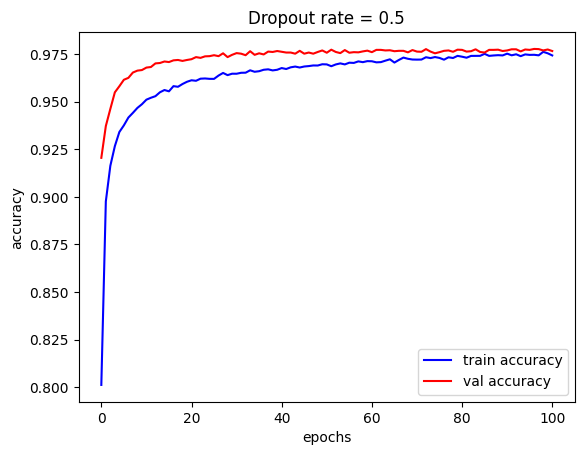

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os

#1
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

#2: normalise images
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

#3: one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train) #(60000, 10)
y_test = tf.keras.utils.to_categorical(y_test) #(10000, 10)

#4: build a model without regularisation
act = "relu"
init = "he_uniform"
n = 100
dropout_rate = 0.5
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(units=n, activation=act, kernel_initializer=init))
model.add(tf.keras.layers.Dropout(rate=dropout_rate))

model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
model.summary()

#4-1: configure the model for training
opt = 'rmsprop'
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#4-2: train and evalute the model
ret = model.fit(x_train, y_train, epochs=101, batch_size=400, 
                validation_data=(x_test, y_test), verbose=0)

train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

#4-3: plot accuracies
plt.title("Dropout rate = %s"%(dropout_rate))
plt.plot(ret.history['accuracy'],    "b-", label="train accuracy")
plt.plot(ret.history['val_accuracy'],"r-", label="val accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc="best")
plt.show()